In [71]:
import warnings
warnings.filterwarnings('ignore')

## Importing Libraries

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [155]:
df = pd.read_csv('train.csv')

In [220]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [156]:
df.shape

(614, 13)

## Data Preprocessing and visualization

In [157]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [161]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [168]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [169]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [170]:
df.duplicated().sum()

0

In [171]:
df1 = df.drop('Loan_ID', axis=1)

In [182]:
categorical_cols = []
numerical_cols = []
for col in df1.columns:
    if df1[col].dtype == object:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [183]:
categorical_cols, numerical_cols

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

In [184]:
count_cols = categorical_cols.copy()
count_cols.append('Loan_Amount_Term')
count_cols.append('Credit_History')

In [185]:
count_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Loan_Amount_Term',
 'Credit_History']

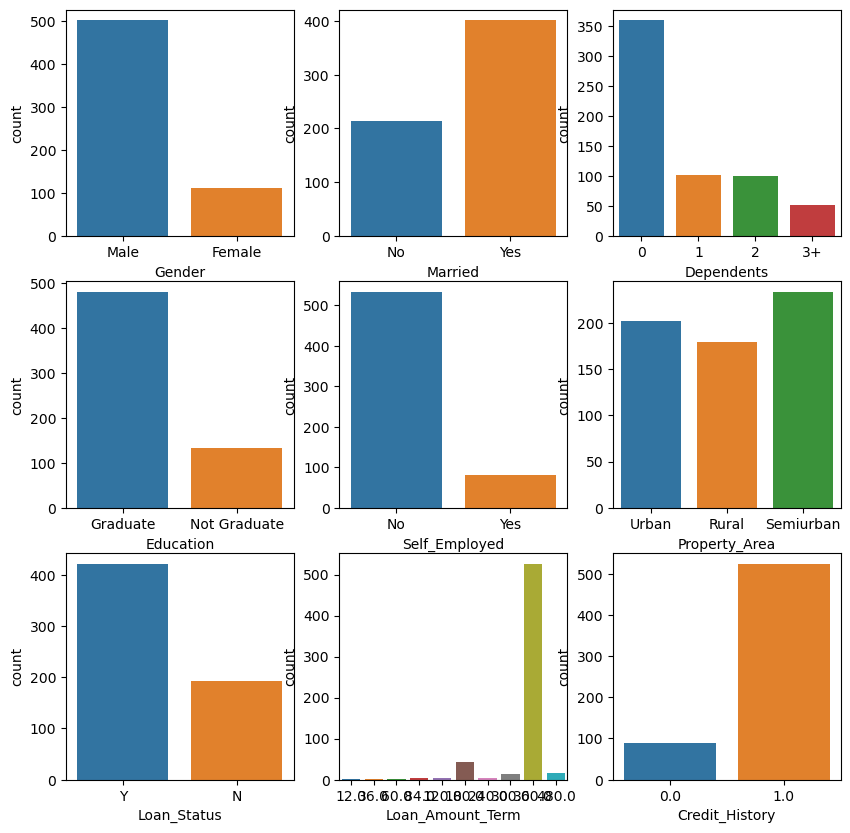

In [187]:
plt.figure(figsize=(10,10))
for i,col in enumerate(count_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df1, x=col)

In [188]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [190]:
df2 = df1.copy()
for col in categorical_cols:
    df2[col] = le.fit_transform(df2[col])

In [191]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [193]:
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

<Axes: >

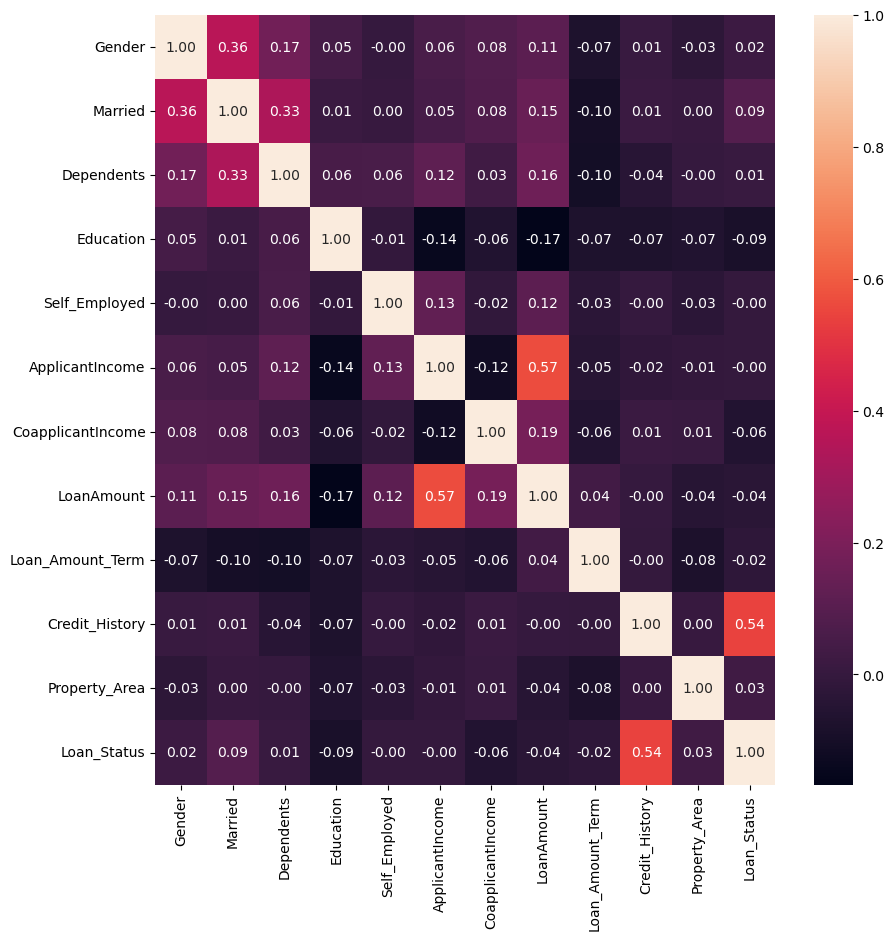

In [196]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True, fmt='0.2f')

## Model Building

In [197]:
x = df2.drop('Loan_Status', axis=1)
y = df2['Loan_Status']

In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [200]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [202]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(),
         SVC(), XGBClassifier()]

In [203]:
models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost']

In [215]:
def model_fit_and_results(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    results = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score - Class 0': f1_score(y_test, y_test_pred, average=None)[0],
        'F1 Score - Class 1': f1_score(y_test, y_test_pred, average=None)[1],
    }
    print(classification_report(y_test,y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    return results, cm

## Results and Discussion

In [216]:
results_list=[]
cm_list=[]
for i in range(len(models)):
    result, cm = model_fit_and_results(models[i], models_names[i], x_train, x_test, y_train, y_test)
    results_list.append(result)
    cm_list.append(cm)

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

              precision    recall  f1-score   support

           0       0.40      0.52      0.45        33
           1       0.80      0.71      0.75        90

    accuracy                           0.66       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.69      0.66      0.67       123

              precision    recall  f1-score   support

           0       0.61      0.42      0.50        33
           1       0.81      0.90      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.66      0.68       123
weighted avg       0.76      0.77      0.76       123

              preci

In [217]:
results_df = pd.DataFrame(results_list)
results_df

,Model,Train Accuracy,Test Accuracy,F1 Score - Class 0,F1 Score - Class 1
0,Logistic Regression,0.806517,0.837398,0.600000,0.897959
1,Decision Tree,1.000000,0.658537,0.447368,0.752941
2,Random Forest,1.000000,0.772358,0.500000,0.852632
3,Gradient Boosting,0.885947,0.788618,0.535714,0.863158
4,SVM,0.816701,0.829268,0.571429,0.893401
5,XGBoost,1.000000,0.829268,0.676923,0.883978


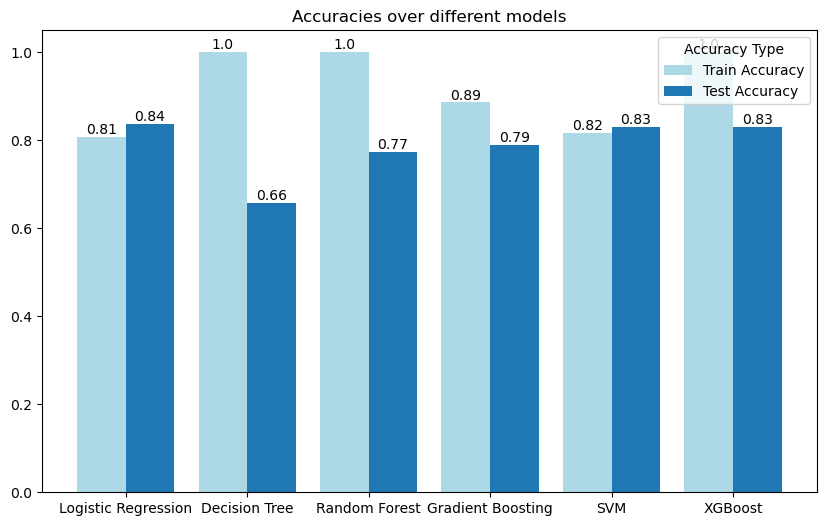

In [218]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Accuracies over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_train = plt.bar(data=results_df, x=bar1, height='Train Accuracy', width=w_bar, color='lightblue')
bars_test = plt.bar(data=results_df, x=bar2, height='Test Accuracy', width=w_bar)
plt.bar_label(bars_train, labels=results_df['Train Accuracy'].round(2))
plt.bar_label(bars_test, labels=results_df['Test Accuracy'].round(2))
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_train, bars_test], title='Accuracy Type', labels=['Train Accuracy', 'Test Accuracy'])
plt.show()

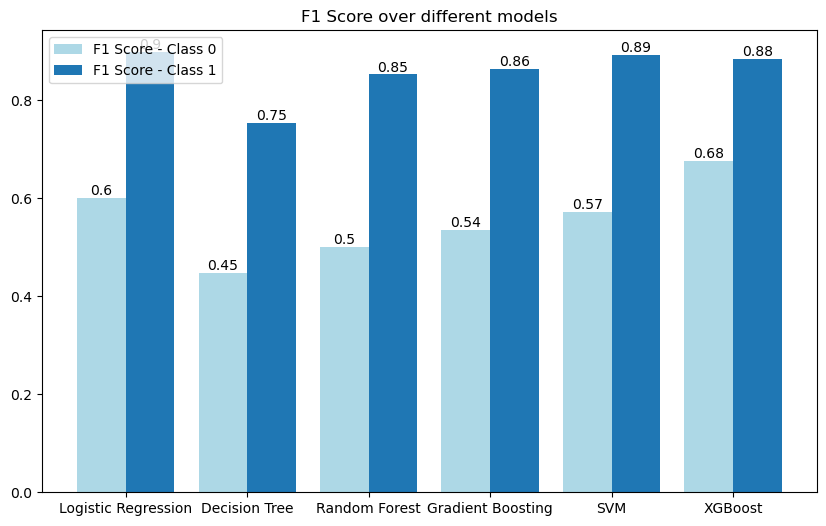

In [219]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('F1 Score over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='F1 Score - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='F1 Score - Class 1', width=w_bar)
plt.bar_label(bars_0, labels=results_df['F1 Score - Class 0'].round(2))
plt.bar_label(bars_1, labels=results_df['F1 Score - Class 1'].round(2))
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_0, bars_1], labels=['F1 Score - Class 0', 'F1 Score - Class 1'])
plt.show()